### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [344]:
# Load the dataset
url = "http://factominer.free.fr/factomethods/datasets/decathlon.txt"
df = pd.read_csv(url, sep="\t")
print(df.head()) 
header = df.columns.values

# Select only the numeric columns (the 10 events)
X = df.iloc[:, :10].values

          100m  Long.jump  Shot.put  High.jump   400m  110m.hurdle  Discus  \
SEBRLE   11.04       7.58     14.83       2.07  49.81        14.69   43.75   
CLAY     10.76       7.40     14.26       1.86  49.37        14.05   50.72   
KARPOV   11.02       7.30     14.77       2.04  48.37        14.09   48.95   
BERNARD  11.02       7.23     14.25       1.92  48.93        14.99   40.87   
YURKOV   11.34       7.09     15.19       2.10  50.42        15.31   46.26   

         Pole.vault  Javeline  1500m  Rank  Points Competition  
SEBRLE         5.02     63.19  291.7     1    8217    Decastar  
CLAY           4.92     60.15  301.5     2    8122    Decastar  
KARPOV         4.92     50.31  300.2     3    8099    Decastar  
BERNARD        5.32     62.77  280.1     4    8067    Decastar  
YURKOV         4.72     63.44  276.4     5    8036    Decastar  


In [345]:
N,P = np.shape(X)
for i in range(P) :
    X[:,i] = (X[:,i] - np.mean(X[:,i]))/np.sqrt(np.var(X[:,i]))

print("means : ", np.mean(X, axis=0))
print("variance : ", np.var(X, axis=0))

means :  [-1.94965995e-16 -2.29085044e-15 -1.47036854e-15  4.92559922e-15
 -1.07231297e-15 -2.77826542e-15 -7.31122480e-16 -8.44852643e-16
 -8.41806299e-16 -2.89741131e-15]
variance :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Introduction to Principal Components Analysis (PCA)

The core idea behind PCA is to find an appropriate representation of a data set that both preserve its shape while reducing its dimensionnality.

## Projecting on affine subspaces

Let us consider $x_1, ..., x_N$ points in $\mathbb{R}^P$. Up to a translation (which does not modify the shape of the cloud of points), we can always assume that $\overline{x}=\frac{1}{N}\sum_{1\leq i \leq N} x_i = 0$

For any affine subset $H \subset \mathbb{R}^P$, we denote by $x_1^H, ..., x_N^H$ the **orthogonal projection** of the points $x_1, ..., x_N$ points in $\mathbb{R}^P$ on $H$. 

We define the empirical variances $\sigma_n^2$ and $\left(\sigma_n^H\right)^2$ by
$$
\boxed{
\sigma_n^2 = \frac{1}{N}\sum_{1\leq i \leq N} \|x_i\|^2_2,
}
\ \ \text{and} \ \
\boxed{
\left(\sigma_n^H\right)^2 = \frac{1}{N}\sum_{1\leq i \leq N} \|x_i^H\|^2_2.
}
$$

The deformation induced by the projection on $H$ can be quantified by 
$$
\frac{1}{N}\sum_{1\leq i \leq N} \|x_i - x_i^H\|^2_2.
$$

By Pythagora's theorem, we have
$$
\boxed{
\sigma_n^2 = \left(\sigma_n^H\right)^2 + \frac{1}{N}\sum_{1\leq i \leq N} \|x_i - x_i^H\|^2_2.
}
$$

## Selecting an optimal subspace

For a fixed dimension $K \leq P$, we are thus left to find the subspace $H$ of dimension $K$ that minimize the quantity
$\sigma_n^2-\left(\sigma_n^H\right)^2$, i.e. that maximize $\left(\sigma_n^H\right)^2$. The problem can be written as
$$
\boxed{
\max_{\text{dim}\left(H\right)=K} \left(\sigma_n^H\right)^2.
}
$$

To identify an optimal subspace, we proceed as follows.
We consider the covariance matrix defined by $C = \frac{1}{N}\sum_{1\leq i \leq N} x_i x_i^T$. This is a symmetric, definite-positive matrix. Using Spectral theorem, we are able to consider its eigenvalues $\lambda_1 \geq ... \geq \lambda_P > 0$ and the associated eigenvectors $e_1, ..., e_P \in \mathbb{R}^P$. For any $1\leq j \leq P$, e have
$$
\boxed{
    Ce_j = \lambda_j e_j.
}
$$

For any $1\leq K \leq P$, we consider $H_K$ defined by
$$
\boxed{
H_K = \text{Span}_{1\leq j \leq K} (e_j).
}
$$
It can be shown that for any linear space $H$ with dimension K, it holds that
$$
\left(\sigma_n^H\right)^2 \leq \left(\sigma_n^{H_K}\right)^2
$$
and that
$$
\left(\sigma_n^{H_K}\right)^2 = \sum_{1\leq j\leq K} \lambda_j.
$$

The $l$-th principal component is the vector $c_l \in \mathbb{R}^N$ defined by
$$
c_l = \left( \langle e_l, x^j \rangle\right)_{1\leq i \leq N}
$$
where $x^j = (x_i^j)_{1\leq i \leq N}$.

In [346]:
# Covariance, and eigenvalues
cov = np.matmul(np.transpose(X), X)/N
eigenvalues, eigenvectors = np.linalg.eig(cov)
index = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[index]
eigenvectors = eigenvectors[:, index]
print(eigenvalues)

# Projection
K = 5
XH = np.matmul(X, eigenvectors)[:,0:K]

# Deformation and empirical variance 
sigmaH = 0
for i in range(K) :
    sigmaH += np.var(XH[:,i])

# Checking
print("empirical variance : ", sigmaH)
print("sum of eigenvalues : ", np.sum(eigenvalues[0:K]))


[3.27190554 1.73713102 1.40491668 1.05685035 0.68477353 0.59926868
 0.45123526 0.39687659 0.21481485 0.18222749]
empirical variance :  8.155577131359069
sum of eigenvalues :  8.155577131359074


## Selecting number of principal components

There are various methods to select the number of principal components to consider (Kaiser rule, broken-stick method, ...).

One strategy consist to observe the **scree plot**, namely the graphical representation of the eigenvalues the covariance matrix (ordered nonincreasingly). This graph usually presents an inflection point. This makes it possible to distinguish two groups of eigencouples: the ones that contains the actual information in the data, and the ones that corresponds to statistical fluctuations.

The figure below shows the scree plot associated to our data set. It exhibits an inflection point around the fifth eigenvalue. This suggests to consider the $K=5$ first eigenvalues. 
The proportion of variance explained is roughly $80\%$.

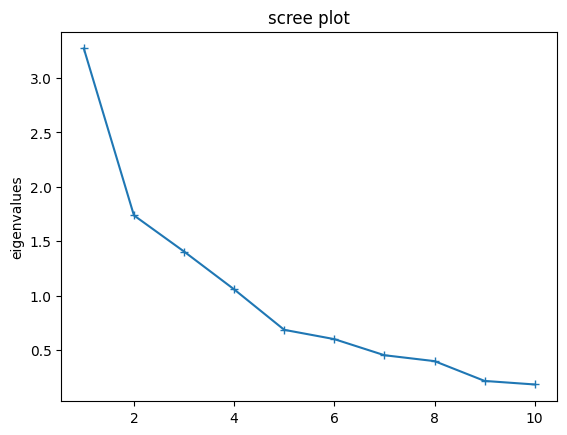

proportion of variance explained :  0.8155577131359069


In [347]:
plt.figure()
plt.plot(np.arange(1, P+1), eigenvalues, marker="+")
plt.title("scree plot")
plt.ylabel("eigenvalues")
plt.show()

print("proportion of variance explained : ", np.sum(eigenvalues[0:K])/np.sum(eigenvalues))

## Interpreting the PCA

The principal components are uncorrelated:
$$
\text{Corr}(c_k, c_l) = \delta_{kl}.
$$
It also holds that for any $1\leq j \leq P$
$$
\text{Corr}\left(c_l, x^j\right) = \frac{\sqrt{\lambda_p}e_l^j}{\sigma_n^j},
$$
and that 
$$
\sum_{1\leq l \leq K} \text{Corr}\left(c_l, x^j\right)^2 = 1.
$$

In order to visualize the correlations between the original features $j$ and the principal components, we can represent the data in the **factorial planes**. 
More precisely, we know that the point $\left(\text{Corr}\left(c_l, x^j\right) \right)_{1\leq l\leq P}$ is located on the unit sphere. 
Consequently, the closer the point $\left(\text{Corr}\left(c_k, x^j\right), \text{Corr}\left(c_l, x^j\right)\right)$ is located to the circle, the better the feature is explained by the principal components $c_l$ and $c_k$. Similarly, the closer this point is to the origin, the lesser the features $x^j$ is correlated to these components.

c_0 :  [-0.77471983  0.74189974  0.62250255  0.5719453  -0.67960994 -0.74624532
  0.55246652  0.05034151  0.27711085 -0.05807706]
c_1 :  [ 0.18714199 -0.34542129  0.59830332  0.35029361  0.56943778  0.22879335
  0.60631339 -0.18035687  0.31698906  0.47422377]
c_2 :  [ 0.18440714 -0.18221105  0.02337844  0.25951193 -0.1314697   0.09263738
 -0.04295225 -0.69175665  0.38965541 -0.7821428 ]


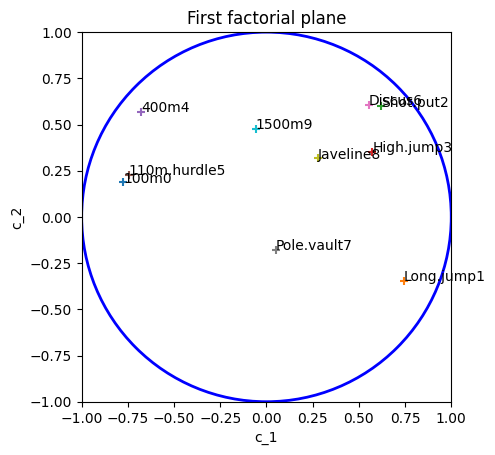

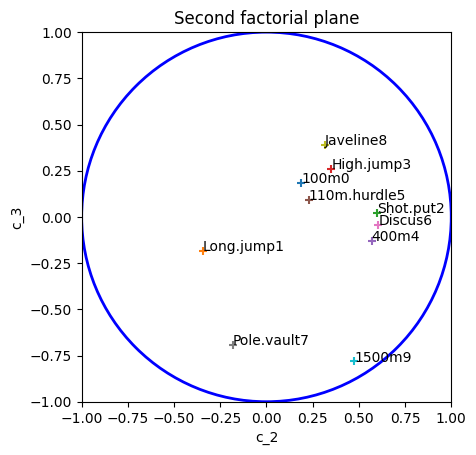

In [348]:
# Compute correlations
Y = np.zeros((P, P))
for k in range(P) :
    for i in range(P) :
        Y[k, i] = np.sqrt(eigenvalues[k]) * eigenvectors[i,k] / np.sqrt(np.var(X[:,i]))

print("c_0 : ", Y[0, :])
print("c_1 : ", Y[1, :])
print("c_2 : ", Y[2, :])

# Visualize first factorial plane
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')  # Ensures the circle is not distorted

circle = plt.Circle((0, 0), 1, fill=False, color='blue', linewidth=2)
ax.add_patch(circle)
for i in range(P) :
    plt.scatter(Y[0, i], Y[1, i], marker = "+")
    ax.annotate(header[i]+str(i), (Y[0, i], Y[1, i]))

plt.xlabel("c_1")
plt.ylabel("c_2")
plt.title("First factorial plane")
plt.show()

# Visualize second factorial plane
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')  # Ensures the circle is not distorted

circle = plt.Circle((0, 0), 1, fill=False, color='blue', linewidth=2)
ax.add_patch(circle)
for i in range(P) :
    plt.scatter(Y[1, i], Y[2, i], marker = "+")
    ax.annotate(header[i]+str(i), (Y[1, i], Y[2, i]))

plt.xlabel("c_2")
plt.ylabel("c_3")
plt.title("Second factorial plane")
plt.show()


According to previous visualizations, we may interpret the principal components as follows.

The first Principal Component opposes pure speed events (100m, 110m hurdles, 400m) to power and technical events (shot put, discus, high jump, long jump). 
This component can be interpreted as an indicator of an individual's inclination towards speed versus power/technique. Note also that 1500m, pole vault and javelin are not strongly correlated with CP1, suggesting these events are better explained by other components.

The second Principal Component captures an individual's capacity for explosive force and throw techniques. 
Indeed, it is strongly and positively correlated with throwing events (discus, shot put, javelin), with correlations $\geq 0.47$. Most other events show weak correlations ($\leq 0.35$) except for the 400m, which surprisingly correlates at $0.57$. 
The javelin’s slightly lower correlation ($0.47$) compared to shot put and discus ($0.60–0.61$) underscores its greater reliance on technique over raw power. The third Principal components supports the distinction between shot put, discus versus javeline.

